<a href="https://colab.research.google.com/github/azhnrs/Project/blob/main/transfer_learning_wayang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tranfer Learning dan Fine Tuning

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
modelTL = tf.keras.applications.DenseNet121()

33188688/33188688 [==============================] - 0s 0us/step


In [ ]:
modelTL.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [ ]:
len(modelTL.layers)

429

In [ ]:
x = modelTL.layers[-2].output
dropOutCus = Dropout(0.5)(x)
output = Dense(units=4, activation='softmax')(dropOutCus)

In [ ]:
model = keras.Model(inputs=modelTL.input, outputs=output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']      

In [ ]:
len(model.layers)

430

In [ ]:
for layer in model.layers[:-20]:
  layer.trainable = False

In [ ]:
# model.summary()

In [ ]:
# len(model.layers)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os, re, glob, cv2, numpy as np

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/My Drive/Computer Vision/Dataset/Wayang/'
dirs = os.listdir(PATH)

In [ ]:
import time
start_time = time.time()
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob(PATH+i+'/*'):
        im = cv2.imread(pic) #open image
        im = cv2.resize(im,(224,224))
        #green channel
        # green_image = im.copy()
        # green_image[:,:,0] = 0
        # green_image[:,:,2] = 0
        # clahe
        lab_im = cv2.cvtColor(im , cv2.COLOR_BGR2LAB)
        l,a,b =cv2.split(lab_im)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        clahe_im = clahe.apply(l)
        updated_lab_im2 = cv2.merge((clahe_im,a,b))
        CLAHE_im = cv2.cvtColor(updated_lab_im2, cv2.COLOR_LAB2BGR)


        # gaus = cv2.GaussianBlur(green_image,(5,5),cv2.BORDER_DEFAULT)
        # ret,thresh = cv2.threshold(CLAHE_im,127,255,cv2.THRESH_BINARY)
        im = np.array(CLAHE_im) #change into array yang thresh
        # im = np.array(gaus) #change into array yg gaussian

        # im = np.array(CLAHE_im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 100): #SAmple
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    # print(im_arr)
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);
print("--- %s seconds ---" % (time.time() - start_time))

Jumlah semar : 100
Jumlah bagong : 100
Jumlah gareng : 100
Jumlah petruk : 100
--- 15.446703433990479 seconds ---


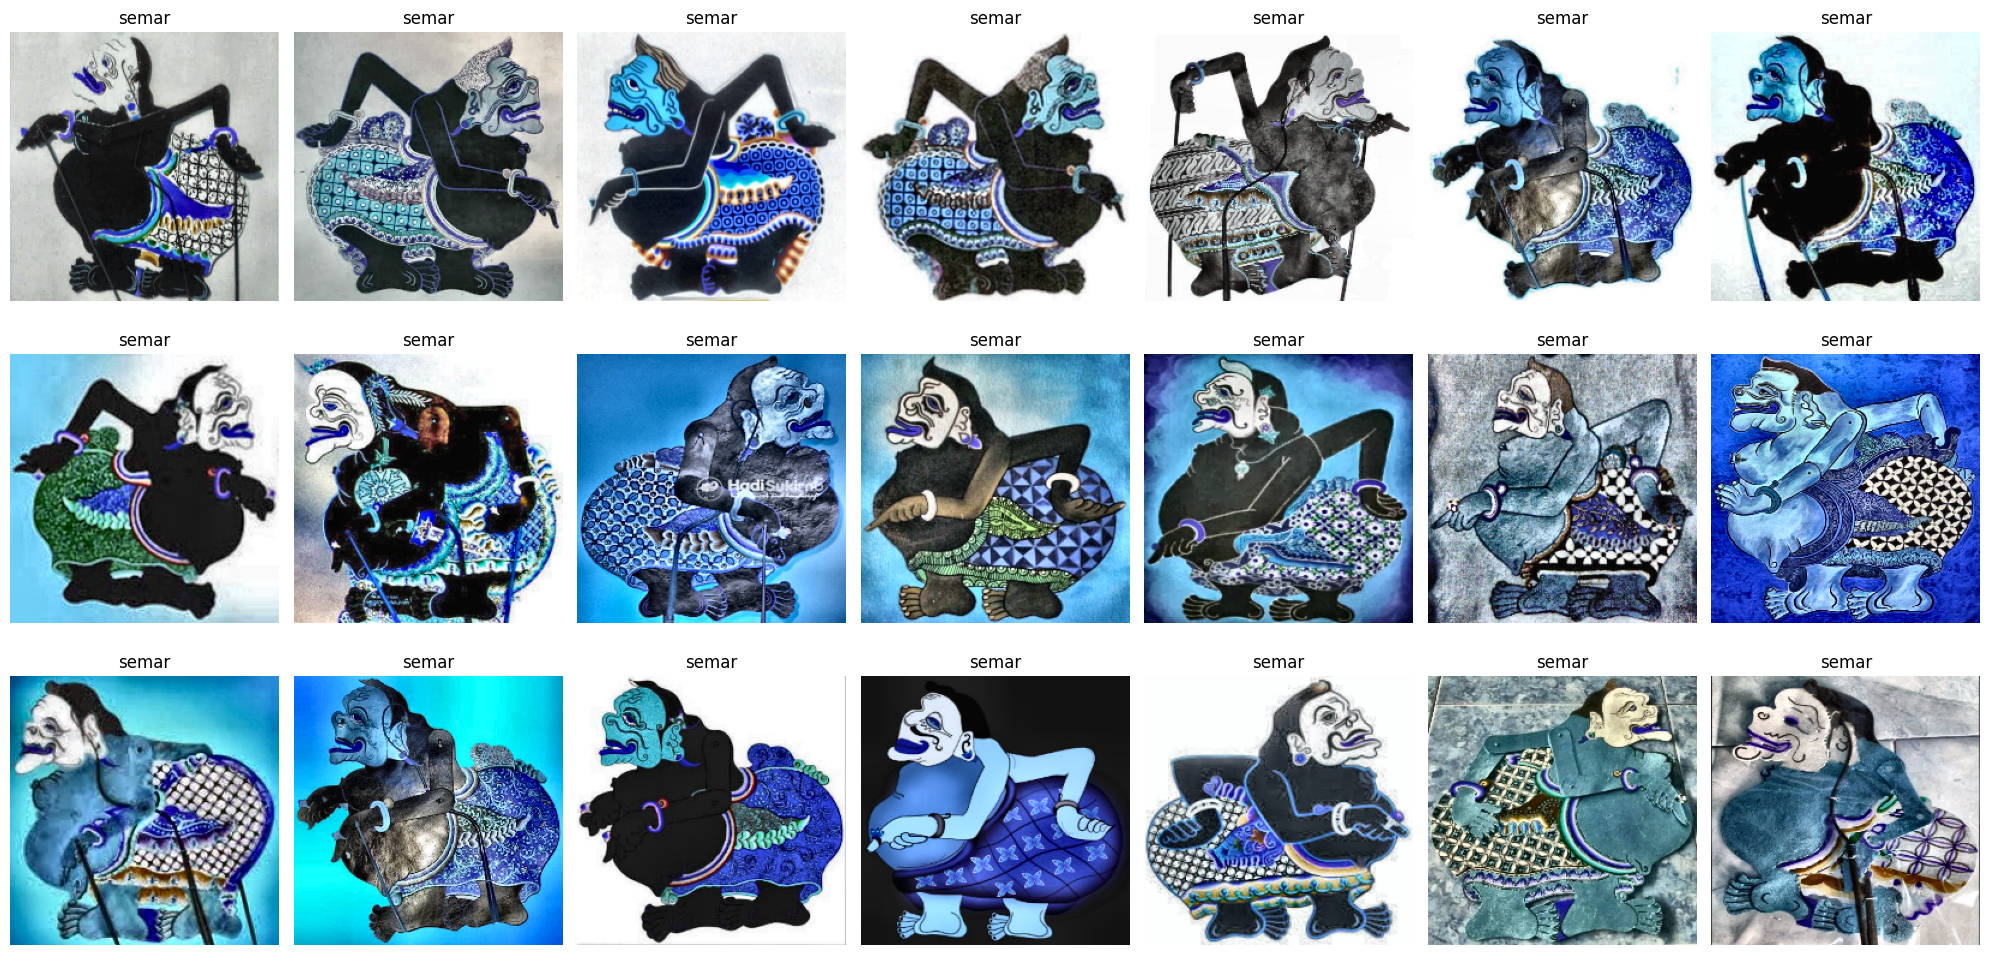

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 7, figsize=(20, 10))
cnt = 0
row = 0
col = 0

for i in im_arr:
    for key, value in i.items():
        if cnt == 7:
            row += 1
            col = 0
            cnt = 0
        if row < 3:
            axs[row, col].imshow(value)
            axs[row, col].set_title(key)
            axs[row, col].axis('off')
            col += 1
            cnt += 1
        else:
            break

plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

# Assuming X and y are already defined and contain your dataset and labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

# Convert data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the test data
X_test /= 255

# One-hot encode the labels
y_train = to_categorical(y_train, 4)  # Assuming you have 4 classes
y_test = to_categorical(y_test, 4)

# Print the shape of the training data for verification
print(X_train.shape)

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1. / 255,        # Rescale the images
    shear_range=0.2,         # Apply shear transformations
    zoom_range=0.2,          # Apply zoom transformations
    horizontal_flip=True,    # Flip images horizontally
    vertical_flip=True       # Flip images vertically
)

# Fit the generator to the training data
datagen.fit(X_train)

# Print the length of the training data for verification
print(len(X_train))


(340, 224, 224, 3)
340


In [ ]:
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9, nesterov=False), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#TRAINING
start_time = time.time()
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
history = model.fit(datagen.flow(X_train, y_train), validation_data=(X_test, y_test), epochs=80, batch_size=16)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/80
11/11 [==============================] - 4s 375ms/step - loss: 1.1864 - accuracy: 0.5294 - val_loss: 1.1056 - val_accuracy: 0.4500
Epoch 2/80
11/11 [==============================] - 4s 354ms/step - loss: 1.2596 - accuracy: 0.4324 - val_loss: 1.0957 - val_accuracy: 0.4500
Epoch 3/80
11/11 [==============================] - 6s 518ms/step - loss: 1.2833 - accuracy: 0.4794 - val_loss: 1.0739 - val_accuracy: 0.4667
Epoch 4/80
11/11 [==============================] - 4s 341ms/step - loss: 1.2745 - accuracy: 0.4618 - val_loss: 1.0569 - val_accuracy: 0.4667
Epoch 5/80
11/11 [==============================] - 6s 491ms/step - loss: 1.2192 - accuracy: 0.5059 - val_loss: 1.0483 - val_accuracy: 0.4500
Epoch 6/80
11/11 [==============================] - 5s 498ms/step - loss: 1.1738 - accuracy: 0.5147 - val_loss: 1.0352 - val_accuracy: 0.4667
Epoch 7/80
11/11 [==============================] - 4s 402ms/step - loss: 1.0822 - accuracy: 0.5412 - val_loss: 1.0238 - val_accuracy: 0.4833
Epoch 

In [ ]:
from google.colab.patches import cv2_imshow

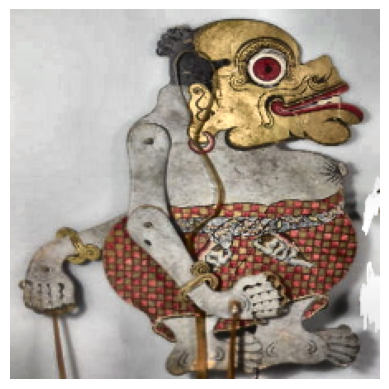

1/1 [==============================] - 0s 29ms/step
Predicted class: gareng
Prediction scores: [0.12248552 0.84854406 0.01964177 0.00932867]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
import matplotlib.pyplot as plt

class_labels = ['bagong', 'gareng', 'petruk', 'semar']

def preprocess_image(image_path, target_size):
    """
    Load, resize, apply CLAHE, and preprocess the image.
    """
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image
    img_resized = cv2.resize(img, target_size)

    # Convert to LAB color space
    lab = cv2.cvtColor(img_resized, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)

    # Merge the CLAHE enhanced L channel back with A and B channels
    lab_clahe = cv2.merge((l_clahe, a, b))

    # Convert back to RGB color space
    img_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

    # Normalize the image to [0, 1] range
    img_array = img_to_array(img_clahe) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Display the image
    plt.imshow(img_clahe)
    plt.axis('off')
    plt.show()

    return img_array

def predict_image(model, image_path, class_labels):
    """
    Predict the class of the image using the given model.
    """
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path, target_size=(224, 224))

    # Make predictions
    predictions = model.predict(preprocessed_image)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class = class_labels[predicted_class_index]

    return predicted_class, predictions[0]

# Example usage
image_path = '/content/drive/MyDrive/Computer Vision/Dataset/Wayang/bagong/100.png'  # Replace with the actual image path
predicted_class, prediction_scores = predict_image(model, image_path, class_labels)

print(f'Predicted class: {predicted_class}')
print(f'Prediction scores: {prediction_scores}')


In [ ]:
#PREDIKSI
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 116ms/step


In [ ]:
# ITERASI X_TEST
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
    max_n = max(y_pred[i])
    max_m = max(y_test[i])
    index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
    index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
    y_prediction_n.append(index_n)
    y_test_n.append(index_m)

In [ ]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, target_names=["bagong","gareng","petruk","semar"]))

              precision    recall  f1-score   support

      bagong       0.93      0.88      0.90        16
      gareng       0.69      0.85      0.76        13
      petruk       0.82      0.74      0.78        19
       semar       0.83      0.83      0.83        12

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
los = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))

los.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['loss'],
                         mode='lines+markers',
                         name='Training loss'))
los.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_loss'],
                         mode='lines+markers',
                         name='Validation loss'))
los.update_layout(title='Loss',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))

fig.show()
los.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 123ms/step


array([[1.15084745e-01, 1.01523347e-01, 6.37341142e-01, 1.46050721e-01],
       [7.97281384e-01, 1.68550327e-01, 2.87912879e-02, 5.37697552e-03],
       [1.91531930e-04, 5.65968105e-04, 1.46415494e-02, 9.84600961e-01],
       [2.93792542e-02, 8.46242547e-01, 1.21626839e-01, 2.75128405e-03],
       [1.03628762e-01, 1.94150373e-01, 6.74423203e-02, 6.34778619e-01],
       [2.48909555e-02, 8.91472027e-03, 7.69838691e-02, 8.89210463e-01],
       [3.70218754e-01, 6.26141548e-01, 2.11507455e-03, 1.52463082e-03],
       [1.57474354e-01, 8.54497701e-02, 7.54214644e-01, 2.86131352e-03],
       [2.21568942e-02, 3.25574726e-02, 2.44179726e-01, 7.01105893e-01],
       [6.53962255e-01, 2.64574379e-01, 7.83371553e-02, 3.12622311e-03],
       [7.64886066e-02, 6.48648381e-01, 2.70240158e-01, 4.62292600e-03],
       [2.33008247e-02, 1.18059836e-01, 6.52706742e-01, 2.05932558e-01],
       [2.37862229e-01, 4.87578452e-01, 2.49598101e-01, 2.49612518e-02],
       [6.59679770e-01, 2.74613202e-01, 6.25008717e

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
y_pred_class = np.argmax(y_pred, axis=1)

print(accuracy_score(y_test_class, y_pred_class))
confusion_matrix(y_test_class, y_pred_class)

0.4


array([[5, 7, 2, 2],
       [4, 6, 3, 0],
       [5, 2, 5, 7],
       [2, 0, 2, 8]])